# Visualizing DKIST Data

In this session we will look at how to take a better look at the actual data once we've downloaded it.
As usual, first we'll need a dataset.
We'll use the VISP data we downloaded at the end of the last notebook.

In [45]:
import dkist
import matplotlib.pyplot as plt

ds = dkist.Dataset.from_directory("~/sunpy/data/VISP/AGLKO")
ds

This Dataset has 4 pixel and 5 world dimensions

dask.array<reshape, shape=(4, 1000, 976, 2555), dtype=float64, chunksize=(1, 1, 976, 2555), chunktype=numpy.ndarray>

Pixel Dim  Axis Name                Data size  Bounds
        0  polarization state               4  None
        1  raster scan step number       1000  None
        2  dispersion axis                976  None
        3  spatial along slit            2555  None

World Dim  Axis Name                  Physical Type                   Units
        0  stokes                     phys.polarization.stokes        unknown
        1  time                       time                            s
        2  helioprojective longitude  custom:pos.helioprojective.lon  arcsec
        3  wavelength                 em.wl                           nm
        4  helioprojective latitude   custom:pos.helioprojective.lat  arcsec

Correlation between pixel and world axes:

               Pixel Dim
World Dim    0    1    2    3
        0  yes   n

## Plotting our data

Getting started with plotting a dataset is straightforward.
`Dataset` provides a `plot()` method which makes a decent default plot of the data.

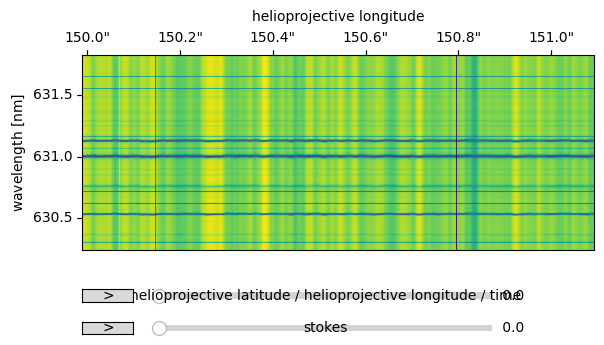

In [46]:
ds.plot()
plt.show()

Since our dataset is 4D and most users will only have access to a 2D screen, a slice has to be taken through the data.
That slice is defined by how the data are ordered and stored in the FITS files.
In this case, since the FITS files are arrays of the spatial axis vs wavelength, this is the slice that has been plotted for a single polarisation state and scan step.

This is where the sliders at the bottom of the plot come in.
These correspond to the axes of the data that aren't shown, and allow you to step through those axes.
This allows you to set the polarisation state and scan step for which the slice is taken, and show the data slice at those coordinates.
Alternatively, you can click the play button at the side of each slider to animate the plot and loop through all those values.

Of course, you will probably find you don't always want to slice through the data in the default way.
In this case, you can use the `plot_axes` argument to `plot()`.
This takes a list which defines which axes to plot as the slice and which to use as the sliders.
The list should contain `"x"` and `"y"` in the locations corresponding to the axes we want to plot, and `None` elsewhere.
The ordering for this is the same as for the pixel dimensions as shown in the `Dataset` summary.

In [47]:
ds

This Dataset has 4 pixel and 5 world dimensions

dask.array<reshape, shape=(4, 1000, 976, 2555), dtype=float64, chunksize=(1, 1, 976, 2555), chunktype=numpy.ndarray>

Pixel Dim  Axis Name                Data size  Bounds
        0  polarization state               4  None
        1  raster scan step number       1000  None
        2  dispersion axis                976  None
        3  spatial along slit            2555  None

World Dim  Axis Name                  Physical Type                   Units
        0  stokes                     phys.polarization.stokes        unknown
        1  time                       time                            s
        2  helioprojective longitude  custom:pos.helioprojective.lon  arcsec
        3  wavelength                 em.wl                           nm
        4  helioprojective latitude   custom:pos.helioprojective.lat  arcsec

Correlation between pixel and world axes:

               Pixel Dim
World Dim    0    1    2    3
        0  yes   n

So the list needed to specify the default ordering would be `[None, None, 'y', 'x']`.

For this next example we are going to crop down the data to a particular region of interest.

In [49]:
small_ds = ds[0, 520:720, :, 1000:1500]

If instead we want to plot the image formed by the raster scan at a particular wavelength and Stokes value, we can change which axes we specify as the x and y axes of the plot.
Remember that since we've sliced the data down to remove the first axis, the `plot_axes` argument is now only three items long.

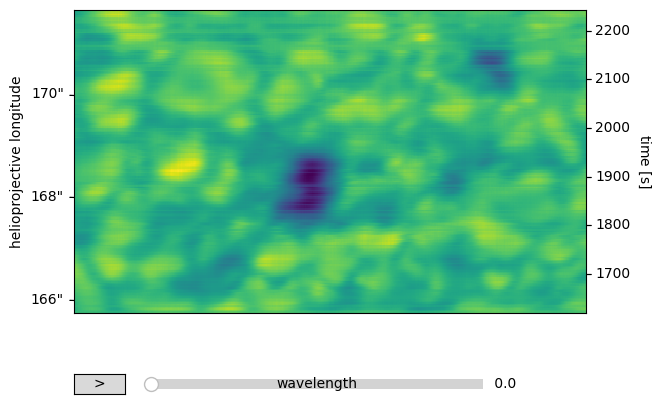

In [56]:
small_ds.plot(plot_axes=['y', None, 'x'], aspect="auto")
plt.show()

You may have noticed this plot took somewhat longer to draw than the previous one.
This is for the same reason as we discussed when talking about reducing the size of dataset downloads: when you slice across the array in a different direction to how it's stored in the files, you have to reference multiple files to create the slice.
So while the first plot only had to load values from one file at a time, the one above needs to get one line of the array from each of 1000 files in order to draw the slice.
If you try to animate it, it then needs to do this again at every step.

```{warning}
For the above example we have very deliberately sliced the data to a size that is manageably small.
Due to some known issues in the plotting code, plotting slices across the data in this way is extremely slow and is not really viable for a full-size dataset.
```

You can also use `plot_axes` to create a line plot, by specifying only one axis of the data.
So to plot a spectrum at a fixed Stokes, time and raster location we can tell plot to use the dispersion axis as the x axis.

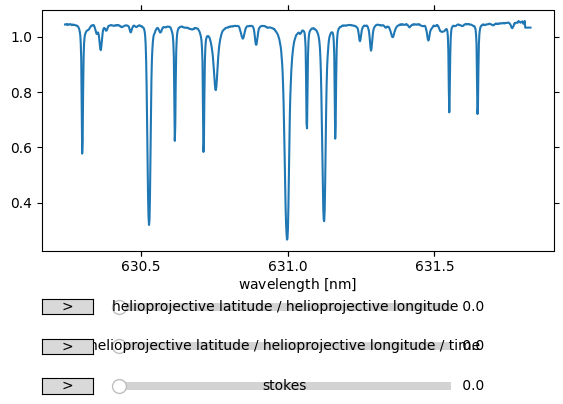

In [52]:
ds.plot(plot_axes=[None, None, 'x', None])
plt.show()

It is also possible to slice the data manually and just plot the result.
This of course creates a new dataset so it will only plot the axes that remain, without sliders or the ability to step through the values of the other axes.

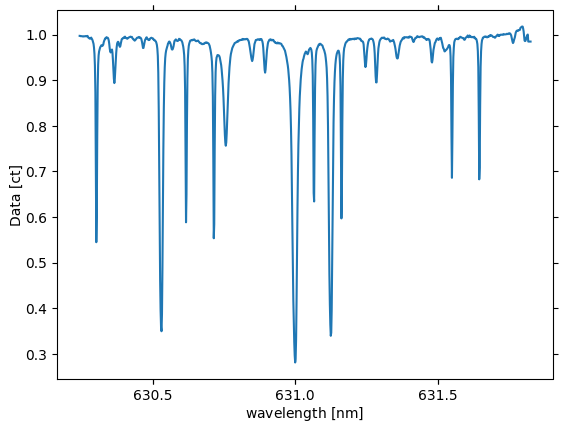

In [53]:
ds[0, 0, :, 200].plot()
plt.show()

## Plotting VBI Data

For the next few examples we'll go back to using some VBI data.
Let's use 'BLKGA', which we used in a previous session.
We haven't actually downloaded the full data for this dataset yet, but the plotting will all still work anyway, and you can download the data later on or in the background if you would like to see the full plots.

In [1]:
import dkist
import matplotlib.pyplot as plt

In [2]:
tds = dkist.Dataset.from_directory("~/sunpy/data/VBI/BLKGA")
ds = tds[0, 0]

Now let's take a slice of the data and plot it.
This returns an axes object which we haven't needed before, but this time we'll assign it to a variable so that we can manipulate the plot.
This allows us to do a number of things with it, such as show the grid of the plot.

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

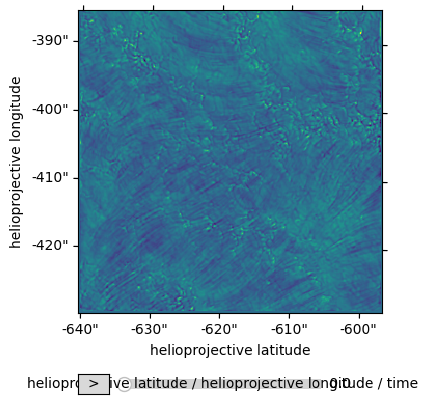

In [3]:
fig = plt.figure()
ds.plot()
fig

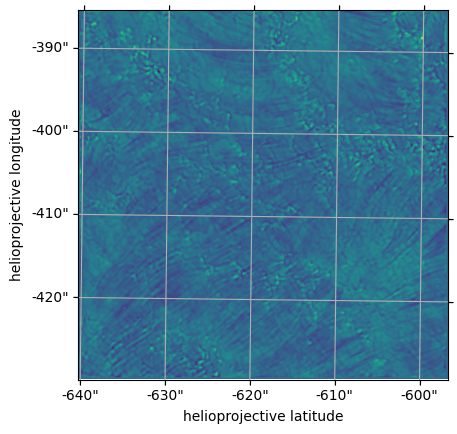

In [4]:
ax = ds[0].plot()
ax.grid(True)
plt.show()

What you will probably notice here is that the grid is not aligned with the pixel grid of the image.
This is because the plot returns a `WCSAxesSubplot`, which is coordinate-aware and automatically uses the world coordinate system for the grid.
It also supports all the usual ways of manipulating subplots.

Since the `WCSAxesSubplot` is coordinate-aware, we can also use it for plotting coordinates directly, without having to do any manual conversions.
To do this, we can use the `.plot_coord()` method.

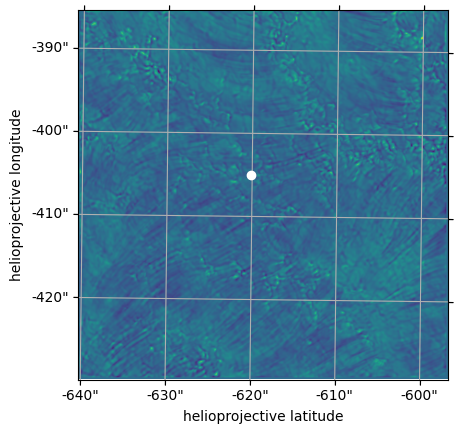

In [7]:
import sunpy.coordinates
import astropy.units as u
from astropy.coordinates import SkyCoord

ax = ds[0].plot()
ax.grid(True)

coord = SkyCoord(-620*u.arcsec, -405*u.arcsec,
                 frame="helioprojective",
                 observer="earth",
                 obstime=ds.headers[0]["DATE-AVG"])
ax.plot_coord(coord, 'wo')
plt.show()

### Using AIA as a Context Image

#### Fetching an AIA Image
Next we are going to use the coordinate information in the VBI dataset to plot VBI's field of view over an AIA image.
To do this we are going to use {obj}`sunpy.map`.

In [13]:
import sunpy.map
from astropy.time import Time
from sunpy.net import Fido, attrs as a

First we shall search for an AIA image closest to the start time of the VBI dataset.

In [14]:
start_time = Time(tds.inventory["startTime"])
end_time = Time(tds.inventory["endTime"])

In [16]:
res = Fido.search(a.Time(start_time - 30*u.s, end_time, start_time), a.Instrument.aia, a.Wavelength(19.4*u.nm))
res

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2022-06-02 17:22:52.000,2022-06-02 17:22:53.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


In [17]:
aia_files = Fido.fetch(res)
aia_files

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/home/stuart/sunpy/data/aia_lev1_193a_2022_06_02t17_22_52_84z_image_lev1.fits']

Now we have an AIA image, let's read it with `sunpy`.

In [18]:
import sunpy.map

Observatory,SDO
Instrument,AIA 2
Detector,AIA
Measurement,193.0 Angstrom
Wavelength,193.0 Angstrom
Observation Date,2022-06-02 17:22:52
Exposure Time,1.99962 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.600714 0.600714] arcsec / pix
Reference Pixel,[2040.370728 2045.074463] pix

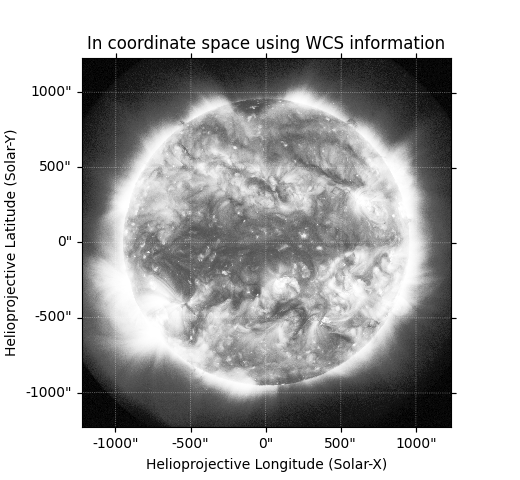
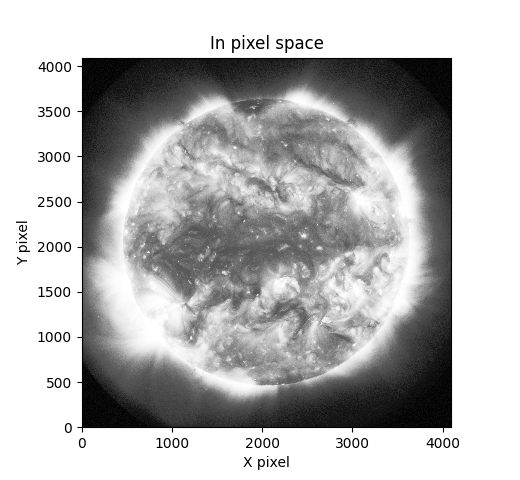
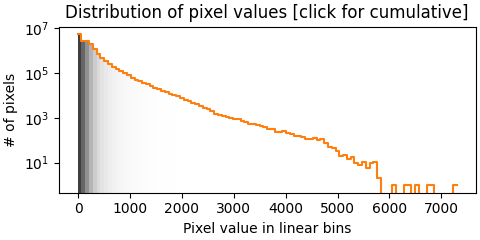
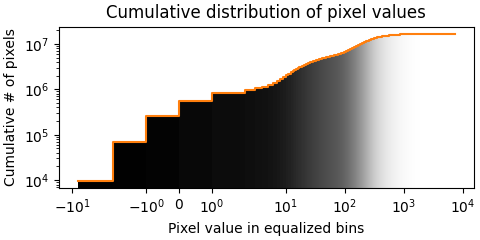

In [22]:
aia = sunpy.map.Map(aia_files)
aia

Now let's make a simple plot of the AIA map.
The sunpy map object has a `.plot()` method which sets up a lot of stuff for us, but we will manually make the figure and axes.

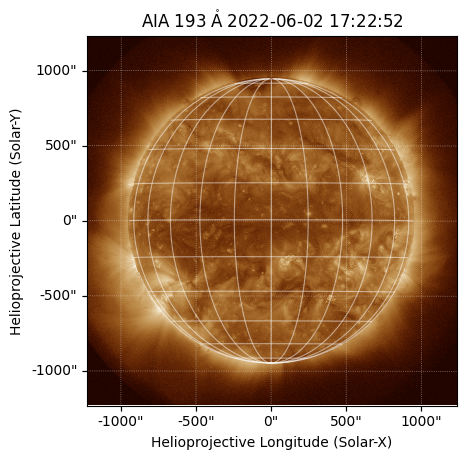

In [27]:
fig = plt.figure()
ax = plt.subplot(projection=aia)
aia.plot(axes=ax)
hgs = aia.draw_grid()

To overplot the field of view of the VBI data we will use the `draw_quadrangle` method:

In [28]:
help(aia.draw_quadrangle)

Help on method draw_quadrangle in module sunpy.map.mapbase:

draw_quadrangle(bottom_left, *, width: (Unit("deg"), Unit("pix")) = None, height: (Unit("deg"), Unit("pix")) = None, axes=None, top_right=None, **kwargs) method of sunpy.map.sources.sdo.AIAMap instance
    Draw a quadrangle defined in world coordinates on the plot using Astropy's
    `~astropy.visualization.wcsaxes.Quadrangle`.
    
    This draws a quadrangle that has corners at ``(bottom_left, top_right)``,
    and has sides aligned with the coordinate axes of the frame of ``bottom_left``,
    which may be different from the coordinate axes of the map.
    
    If ``width`` and ``height`` are specified, they are respectively added to the
    longitude and latitude of the ``bottom_left`` coordinate to calculate a
    ``top_right`` coordinate.
    
    Parameters
    ----------
    bottom_left : `~astropy.coordinates.SkyCoord` or `~astropy.units.Quantity`
        The bottom-left coordinate of the rectangle. If a `~astropy.coo

#### Computing the VBI field of View

As we can see from the docstring of `aia.draw_quadrangle` we can specify a bottom left and a top right coordinate.
We can calculate the bottom left coordinate of a VBI tile like this:

In [35]:
ds[0].wcs.array_index_to_world(ds.data.shape[0], 0)

<SkyCoord (Helioprojective: obstime=2022-06-02T17:35:10.516, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2022-06-02T17:35:10.516, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.00194073, -0.48784766, 1.51723474e+11)>): (Tx, Ty) in arcsec
    (-640.21453658, -429.65815648)>

In [36]:
ds[0].wcs.array_index_to_world(0, ds.data.shape[1])

<SkyCoord (Helioprojective: obstime=2022-06-02T17:35:10.516, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2022-06-02T17:35:10.516, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.00194073, -0.48784766, 1.51723474e+11)>): (Tx, Ty) in arcsec
    (-596.64805354, -429.33547912)>

Note in the docstring it says:

> The bottom-left coordinate of the rectangle. If a `SkyCoord` it can have shape `(2,)` and simultaneously define `top_right`.

This is because, as we briefly saw yesterday, a `SkyCoord` object can be an array.
If we pass `array_index_to_world` an array-like input it will give us an array-like output:

In [37]:
corners = ds[0].wcs.array_index_to_world([0, ds[0].data.shape[0]],
                                         [0, ds[0].data.shape[1]]
)
corners

<SkyCoord (Helioprojective: obstime=2022-06-02T17:35:10.516, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2022-06-02T17:35:10.516, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.00194073, -0.48784766, 1.51723474e+11)>): (Tx, Ty) in arcsec
    [(-640.21226411, -429.86446456), (-597.13797014, -384.8598006 )]>

So here for the first array index dimension we are giving it the bottom left row index and the top right row index and for the second array index dimension we are giving it the bottom left column index and the top right column index.

This gives us back a `SkyCoord` with two elements in both `Tx` and `Ty`:

In [39]:
corners.Ty

<Latitude [-429.86446456, -384.8598006 ] arcsec>

#### Plotting VBI Field of View on AIA Images

Now we can use this to overplot the field of view of this single VBI tile:

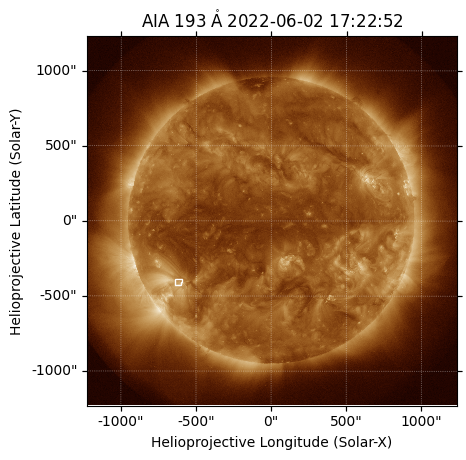

In [40]:
fig = plt.figure()
ax = plt.subplot(projection=aia)
aia.plot(axes=ax)
aia.draw_quadrangle(corners)

With a couple of loops we can do the same thing for all the VBI tiles in the `TiledDataset` object.
First, let us calculate the corners of all the tiles:

In [41]:
bounding_boxes = []
for tile in tds.flat:
    tile = tile[0]
    corners = tile.wcs.array_index_to_world(
        [0, tile.data.shape[0]],
        [0, tile.data.shape[1]]
    )
    bounding_boxes.append(corners)

Now with another loop we can plot all of these tiles on the AIA image:

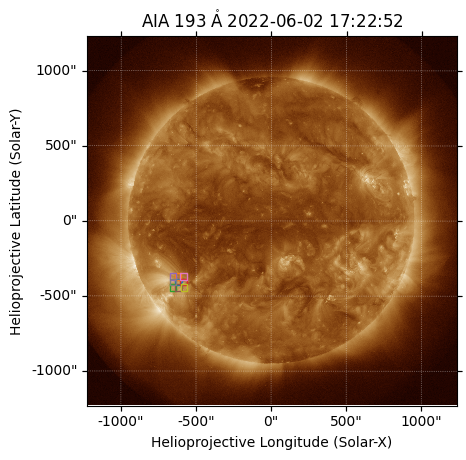

In [42]:
fig = plt.figure()
ax = plt.subplot(projection=aia)
aia.plot(axes=ax)
for i, tile_bb in enumerate(bounding_boxes):
    aia.draw_quadrangle(tile_bb, edgecolor=f"C{i}")

Finally, we can zoom in a little.
If you are doing this interactively you can zoom in with the UI, here I shall do it by specifying pixel coordinates:

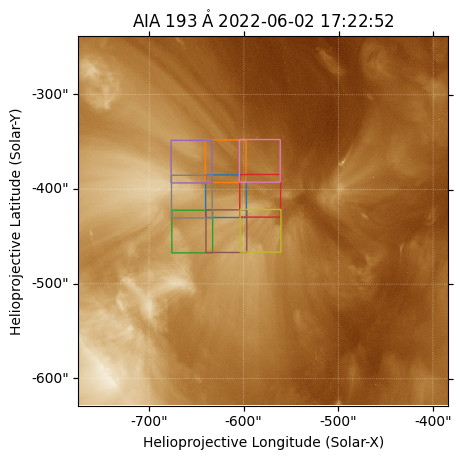

In [43]:
_ = ax.axis((750, 1400, 1000, 1650))
fig